In [28]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

#Problem 1

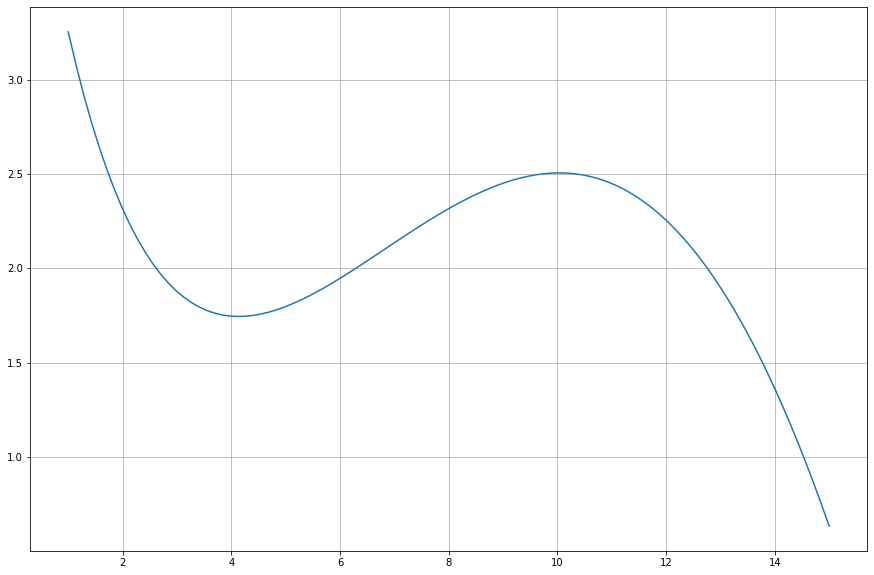

In [29]:
x = np.linspace(1, 15, 100)
y = f(x)


plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.grid(which='both')
plt.show()

In [32]:
def poly(x):
    return (np.linalg.solve(np.vander(x), f(x)))

poly1 = poly(np.array([1, 15]))
poly2 = poly(np.array([1, 8, 15]))
poly3 = poly(np.array([1, 4, 10, 15]))

poly1, poly2, poly3

(array([-0.18692825,  3.43914511]),
 array([-0.00760104, -0.06531159,  3.32512949]),
 array([-0.00823565,  0.19333685, -1.29552587,  4.36264154]))

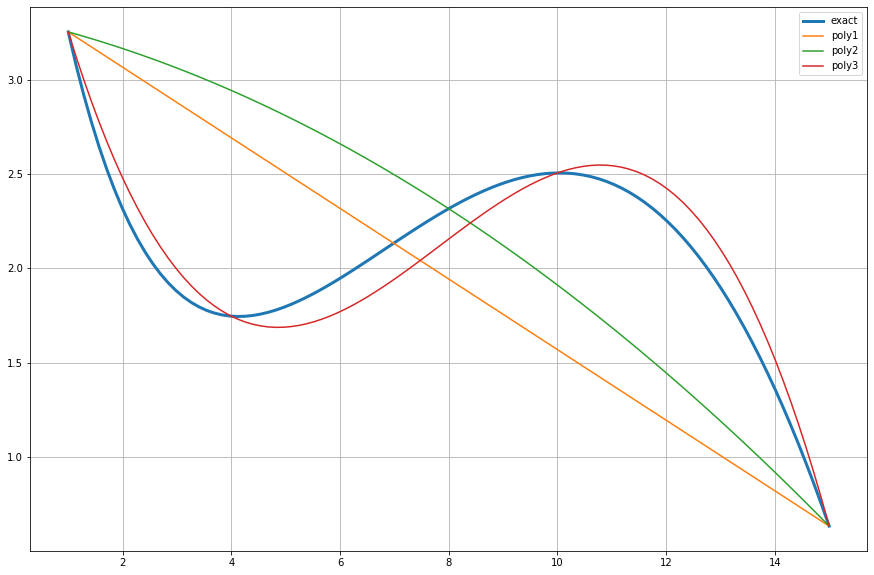

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, lw=3, label="exact")
plt.plot(x, np.polyval(poly1, x), label="poly1")
plt.plot(x, np.polyval(poly2, x), label="poly2")
plt.plot(x, np.polyval(poly3, x), label="poly3")
plt.grid(which='both')
plt.legend()
plt.show()

#Problem 2

Есть два вектора одинаковой длины: x и y. Надо найти количество позиций, для которых элементы в обоих векторах ненулевые. Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент.

Например:

```
x = [1, 0, 1, 1, 0, 1, 1]
y = [0, 2, 0, 2, 0, 2, 0]

Answer: 2, 6
```



In [34]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

def problem2(x, y):
    print(np.count_nonzero(x*y))
    print(np.count_nonzero(abs(x) + abs(y)))

problem2(x, y)

2
6


#Problem 3

В векторе x надо повторить каждый элемент N раз подряд.

Например:
```
x = [1, 2, 0], N = 3

Answer: [1, 1, 1, 2, 2, 2, 0, 0, 0]
```

In [35]:
x = np.array([1, 2, 0])
N = 4

def problem3(x, N):
    mat = x + np.zeros((N, 1))  # broadcasting magic
    return mat.T.reshape(N*len(x))  # reshaping back into array

problem3(x, N)

array([1., 1., 1., 1., 2., 2., 2., 2., 0., 0., 0., 0.])

#Problem 4

В векторе x надо найти максимальный элемент среди тех, перед которыми стоит ноль.

Например:
```
x = [0, 11, 0, 0, -7, 2, 0, 4, 0]

Answer: 11
```

In [36]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])

# cond is a mask of elements which succede zero
cond = np.roll(x == 0, 1)
cond[0] = 0

arr = x[cond == 1]
print(max(arr))


11


#Problem 5

В векторе x надо заполнить каждый нулевой элемент предыдущим ненулевым значением.

Например:
```
x = [8, 0, 0, 1, 0, 0, 0, -17.5, 0]

Answer: [8, 8, 8, 1, 1, 1, 1, -17.5, -17.5]
```

In [37]:
x = np.array([8, 0, 0, 2, 1, 0, 0, -17.5, 0])

while len(x[x == 0]) > 0:
    a = np.roll((x == 0).astype(np.int), -1) * x
    x += np.roll(a, 1)
print(x)


[  8.    8.    8.    2.    1.    1.    1.  -17.5 -17.5]
